In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('./datasets/TON-IoT/train_test_ton_iot.csv')

In [17]:
import json
feature_description = json.load(open('./datasets/TON-IoT/feature_description.json'))

numeric_columns = [feature['key'] for feature in feature_description if feature['is_num']]

In [44]:
# 计算每个数值列的80%分位数
quantiles = data[numeric_columns].quantile(0.8)

# 过滤数据，只保留数值列中小于等于80%分位数的数据
filtered_data = data.copy()
for column in numeric_columns:
    # filtered_data = filtered_data[(filtered_data[column] <= quantiles[column]) & (filtered_data[column] > 0)]
    filtered_data = filtered_data[filtered_data[column] == 0]

# 打印过滤后的数据
filtered_data

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.0,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
6,1554198364,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
7,1554198364,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
8,1554198369,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254477,1556250459,172.17.0.3,42501,192.168.1.190,53,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
261407,1556250686,172.17.0.3,58312,192.168.1.190,53,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
261574,1556250715,172.17.0.3,52840,192.168.1.190,53,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal
261623,1556250721,172.17.0.3,60084,192.168.1.190,53,udp,-,0.0,0,0,...,0,0,-,-,-,-,-,-,0,normal


In [ ]:
filtered_data = data[(data['src_bytes'] != 0) & (data['dst_bytes'] == 0)]
filtered_data['type'].value_counts()

In [46]:
for column in numeric_columns:
    filtered_data = data[(data[column] == 0)]
    print(column)
    print(filtered_data['type'].value_counts())
    print('-----------------')


duration
type
normal        158709
ransomware     20000
scanning       15350
xss            11151
ddos             503
password         210
injection         70
dos               21
mitm               7
Name: count, dtype: int64
-----------------
src_bytes
type
normal        182244
ransomware     20000
backdoor       19828
scanning       19367
dos            18411
xss            13633
ddos           13514
password        4840
injection       1263
mitm              51
Name: count, dtype: int64
-----------------
dst_bytes
type
normal        197466
ransomware     20000
backdoor       19936
scanning       19370
dos            18409
xss            13295
ddos           12621
password        4839
injection       1503
mitm              90
Name: count, dtype: int64
-----------------
missed_bytes
type
normal        299079
scanning       20000
ransomware     20000
password       19985
backdoor       19974
dos            19970
xss            19666
injection      18963
ddos           18761
mitm    

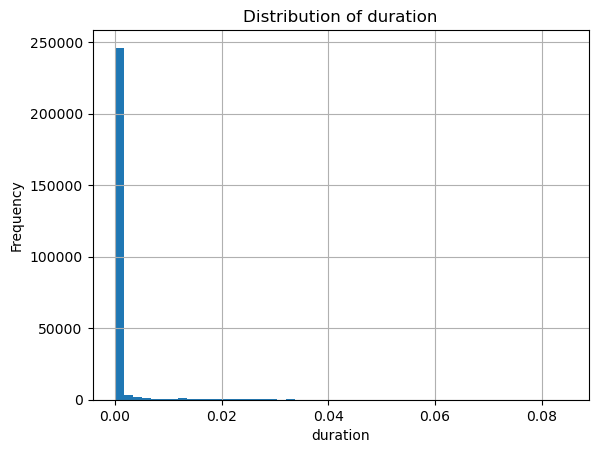

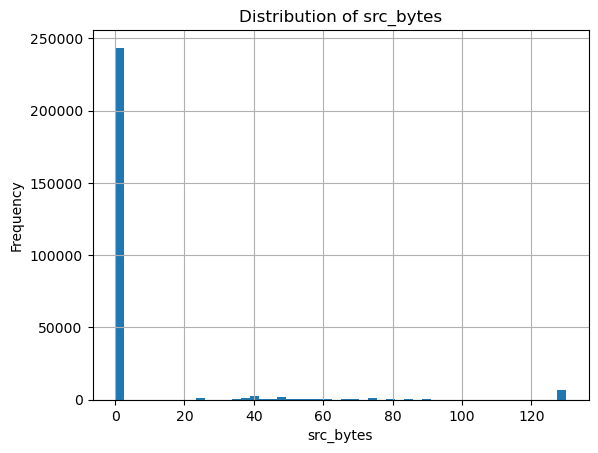

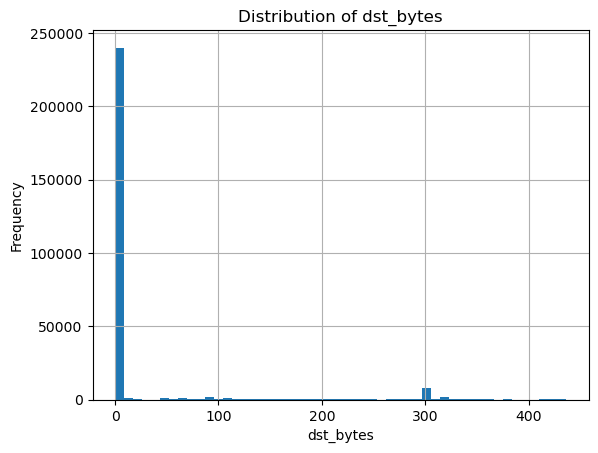

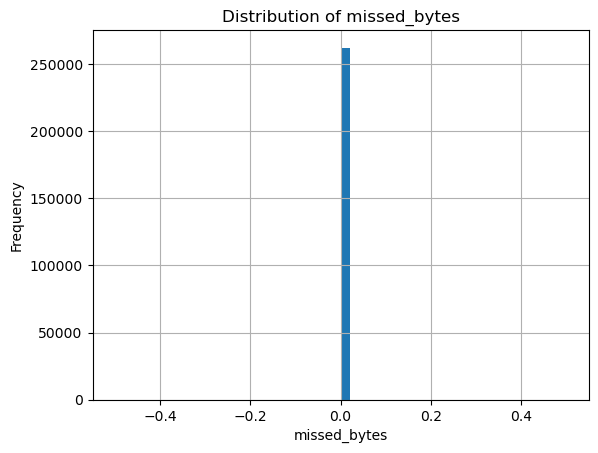

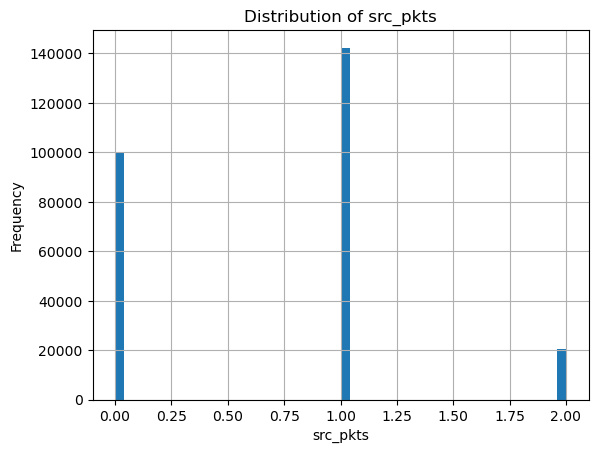

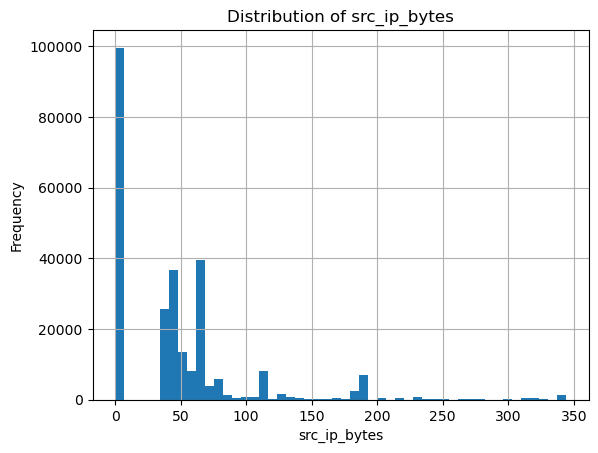

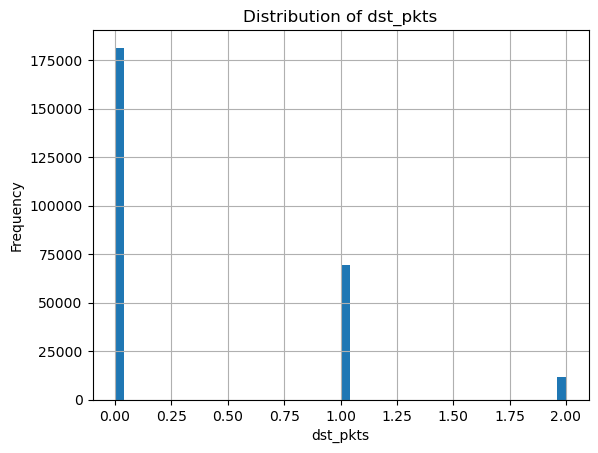

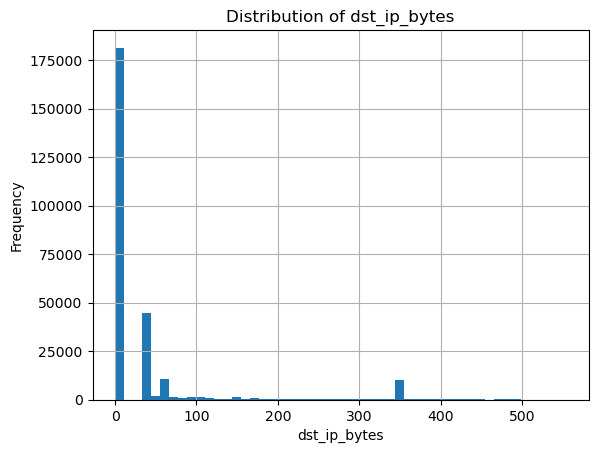

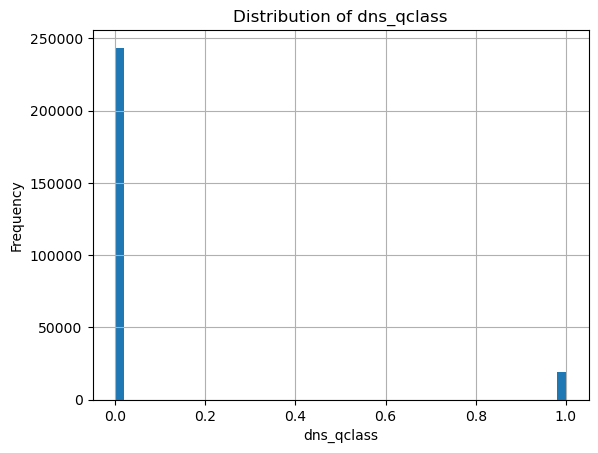

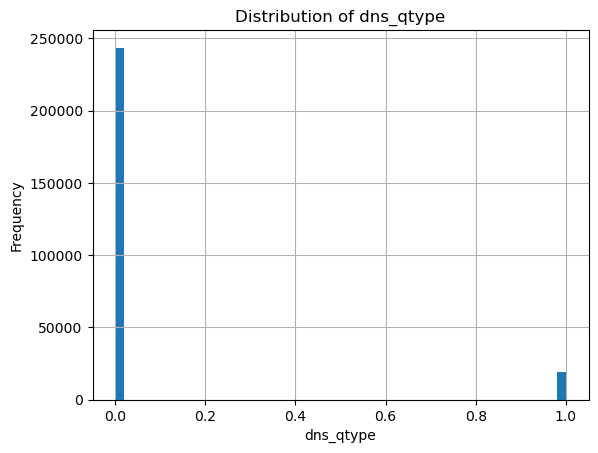

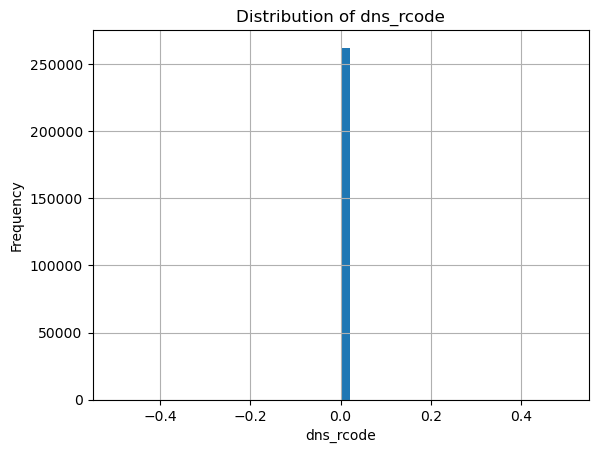

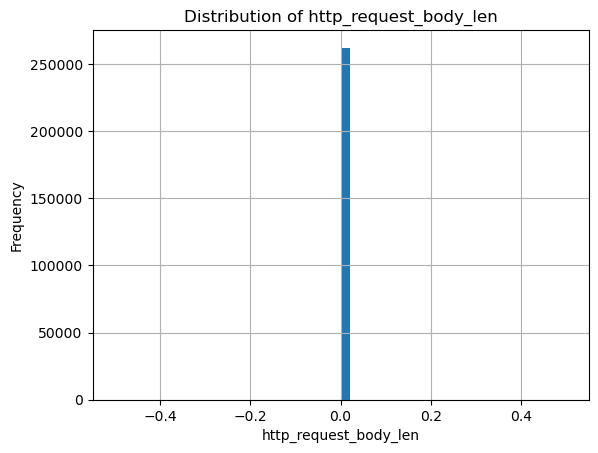

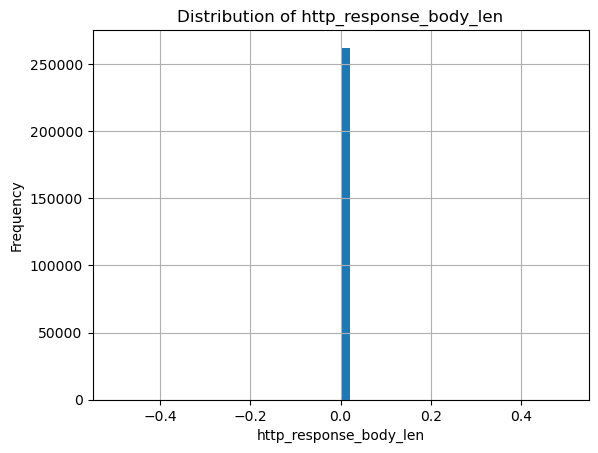

In [24]:
import matplotlib.pyplot as plt

# 遍历 feature_description，找到所有 is_num 为 true 的列
numeric_columns = [feature['key'] for feature in feature_description if feature['is_num']]

# 绘制每个数值列的直方图
for column in numeric_columns:
    plt.figure()
    filtered_data[column].hist(bins=50)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
# 获取每一列第一个bin的边界
bin_edges = {}
for column in numeric_columns:
    bin_edges[column] = np.histogram_bin_edges(data[column], bins=50)

print(bin_edges)

# 获取每一列第一个bin中的数据
filtered_data = data.copy()
for column in numeric_columns:
    first_bin_mask = (data[column] >= bin_edges[column][0]) & (data[column] < bin_edges[column][1])
    filtered_data = filtered_data[first_bin_mask]

# 打印过滤后的数据
print(filtered_data)

{'duration': array([    0.       ,  1870.3385834,  3740.6771668,  5611.0157502,
        7481.3543336,  9351.692917 , 11222.0315004, 13092.3700838,
       14962.7086672, 16833.0472506, 18703.385834 , 20573.7244174,
       22444.0630008, 24314.4015842, 26184.7401676, 28055.078751 ,
       29925.4173344, 31795.7559178, 33666.0945012, 35536.4330846,
       37406.771668 , 39277.1102514, 41147.4488348, 43017.7874182,
       44888.1260016, 46758.464585 , 48628.8031684, 50499.1417518,
       52369.4803352, 54239.8189186, 56110.157502 , 57980.4960854,
       59850.8346688, 61721.1732522, 63591.5118356, 65461.850419 ,
       67332.1890024, 69202.5275858, 71072.8661692, 72943.2047526,
       74813.543336 , 76683.8819194, 78554.2205028, 80424.5590862,
       82294.8976696, 84165.236253 , 86035.5748364, 87905.9134198,
       89776.2520032, 91646.5905866, 93516.92917  ]), 'src_bytes': array([0.00000000e+00, 7.78171025e+07, 1.55634205e+08, 2.33451308e+08,
       3.11268410e+08, 3.89085513e+08, 4.6690

C:\Users\QishuoBai\AppData\Local\Temp\ipykernel_4580\751621087.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[first_bin_mask]
C:\Users\QishuoBai\AppData\Local\Temp\ipykernel_4580\751621087.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[first_bin_mask]
C:\Users\QishuoBai\AppData\Local\Temp\ipykernel_4580\751621087.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[first_bin_mask]
C:\Users\QishuoBai\AppData\Local\Temp\ipykernel_4580\751621087.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[first_bin_mask]
C:\Users\QishuoBai\AppData\Local\Temp\ipykernel_4580\751621087.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[first_bin_mask]
C:\Users\QishuoBai\AppData\Loc

                ts         src_ip  src_port         dst_ip  dst_port proto  \
1       1554198358   192.168.1.79     47260  192.168.1.255     15600   udp   
2       1554198359  192.168.1.152      1880  192.168.1.152     51782   tcp   
3       1554198359  192.168.1.152     34296  192.168.1.152     10502   tcp   
4       1554198362  192.168.1.152     46608  192.168.1.190        53   udp   
5       1554198364   192.168.1.79     33269  192.168.1.255     15600   udp   
...            ...            ...       ...            ...       ...   ...   
461038  1556340862   192.168.1.32     33108  176.28.50.165        80   tcp   
461039  1556423390   192.168.1.33     37242  34.230.157.88       443   tcp   
461040  1556436603   192.168.1.37      4444  192.168.1.193     49178   tcp   
461041  1556540442   192.168.1.31     60816  104.98.29.100       443   tcp   
461042  1556540442   192.168.1.31     41054  151.101.24.64       443   tcp   

       service    duration  src_bytes  dst_bytes  ... http_resp

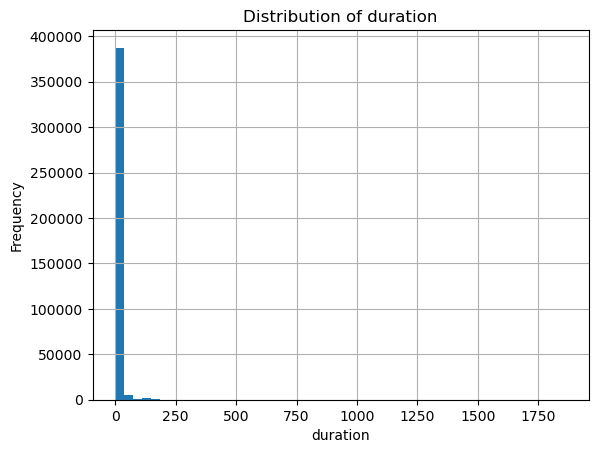

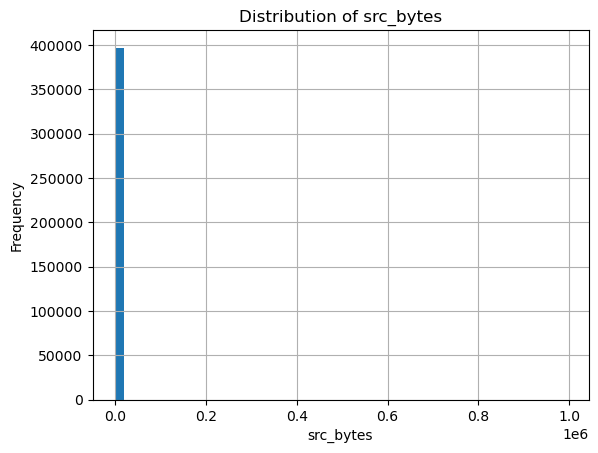

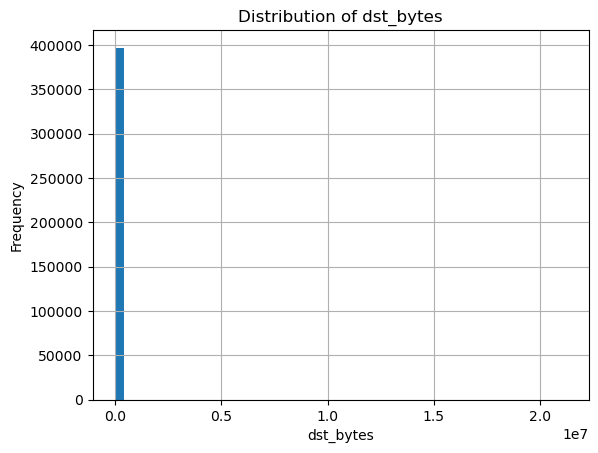

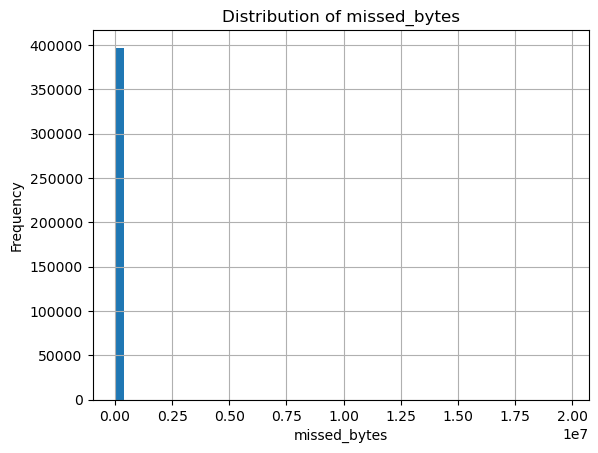

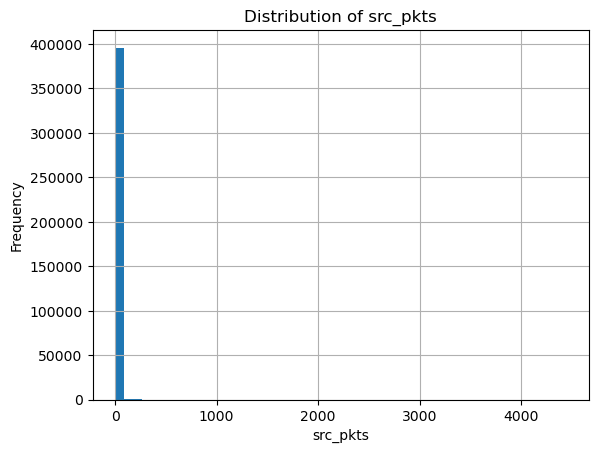

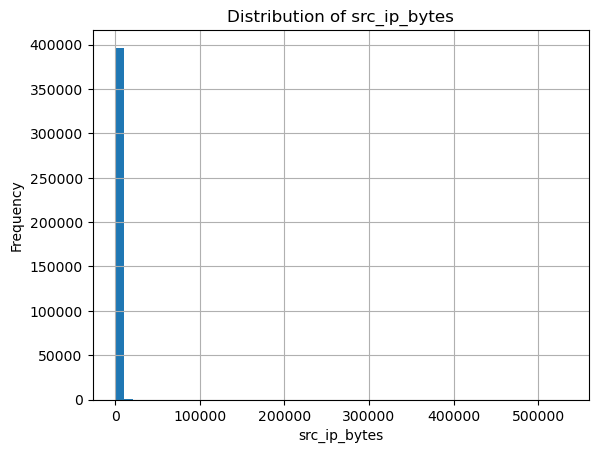

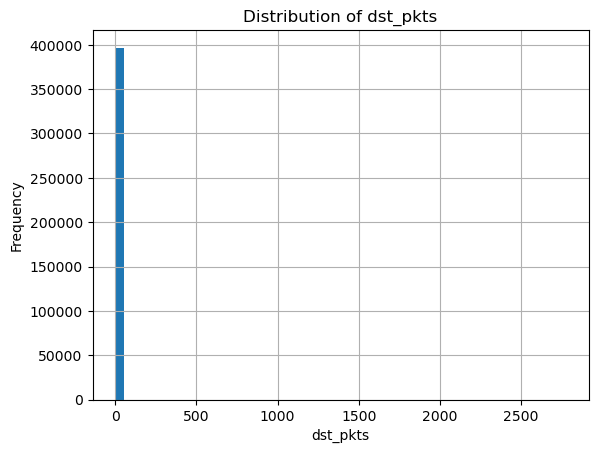

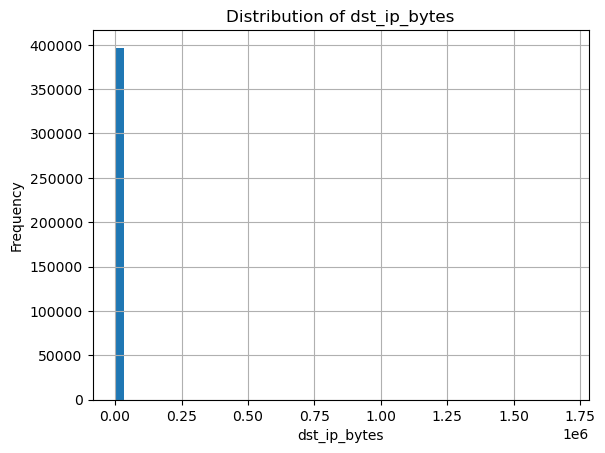

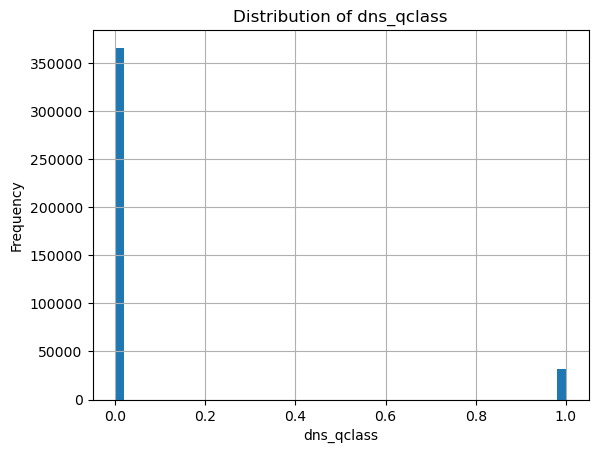

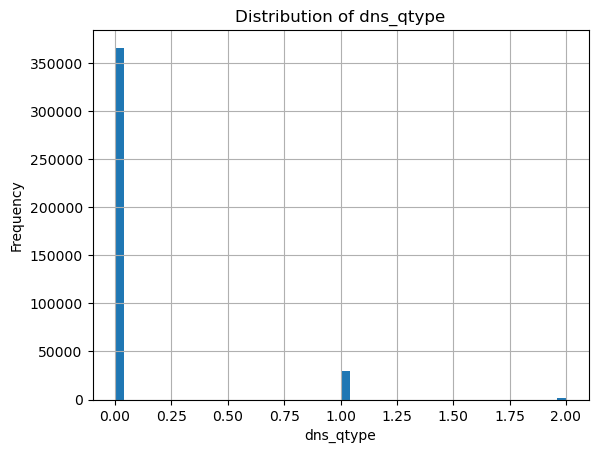

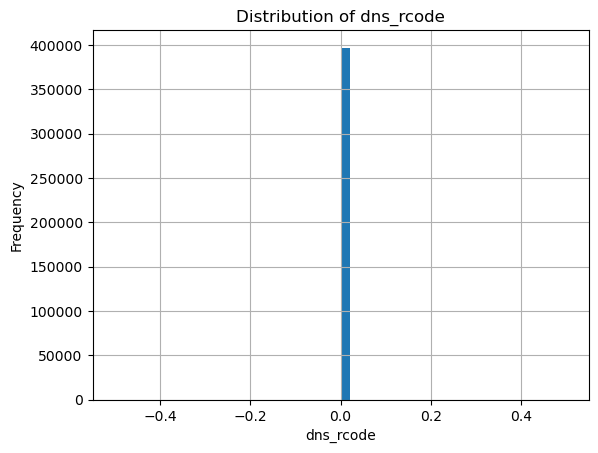

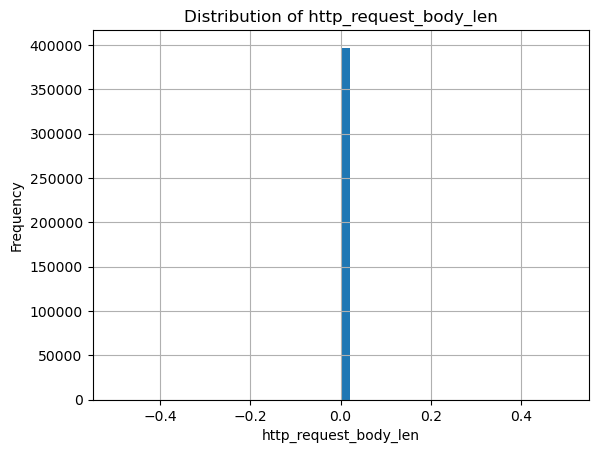

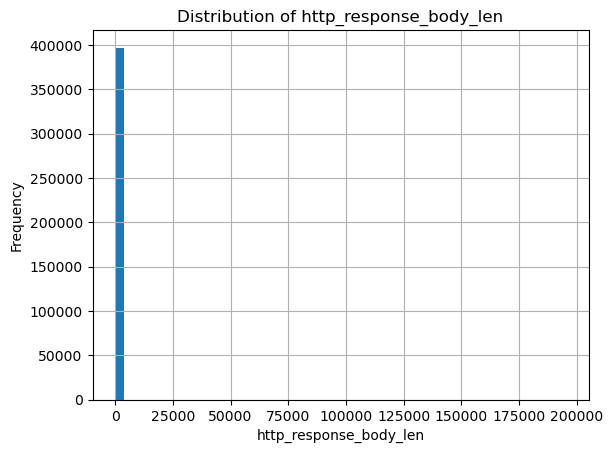

In [13]:
# 绘制每个数值列的直方图
for column in numeric_columns:
    plt.figure()
    filtered_data[column].hist(bins=50)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()